## Clustering of football players

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns # for plotting
import scipy.cluster.hierarchy as shc
import sklearn.preprocessing as skpp
import matplotlib.cm as cm # colormap

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering, KMeans
import re


In [2]:
data = pd.read_csv('/Users/iMotz/Propulsion/Machine_learning/data_sets/PlayerAttributeData.csv',index_col=0)

data.head(5)



/Users/iMotz/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (11,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,89,63,89,63,93,95,85,81,91,94,...,96,83,94,23,91,92,31,80,85,88
1,92,48,90,95,95,96,77,89,97,95,...,95,88,85,26,87,73,28,59,90,85
2,94,56,96,82,95,92,75,81,96,89,...,88,81,80,33,90,78,24,53,80,83
3,88,78,86,60,91,83,77,86,86,94,...,93,83,87,38,77,89,45,80,84,88
4,58,29,52,35,48,70,15,14,30,13,...,85,55,25,11,61,44,10,83,70,11


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17981 entries, 0 to 17980
Data columns (total 35 columns):
Acceleration          17981 non-null object
Aggression            17981 non-null object
Agility               17981 non-null object
Balance               17981 non-null object
Ball control          17981 non-null object
Composure             17981 non-null object
Crossing              17981 non-null object
Curve                 17981 non-null object
Dribbling             17981 non-null object
Finishing             17981 non-null object
Free kick accuracy    17981 non-null object
GK diving             17981 non-null object
GK handling           17981 non-null object
GK kicking            17981 non-null object
GK positioning        17981 non-null object
GK reflexes           17981 non-null object
Heading accuracy      17981 non-null object
ID                    17981 non-null int64
Interceptions         17981 non-null object
Jumping               17981 non-null object
Long passing

### Clean data

In [4]:
data.shape


(17981, 35)

In [5]:
# drop duplicates ?
data.drop_duplicates()
data.shape

(17981, 35)

In [6]:
# check nans
# data.isna().sum()

In [7]:
# drop some cols
data_clean = data.drop(columns = ['ID'])

# the data contains strings, and even sums! eg 5 + 7
# find + and -, re.match(), re.search(), re.findall()

my_expr = r'[+-]\d+'
data_clean = data_clean.replace(to_replace = my_expr, value = '', regex = True)

# convert to numbers
data_clean = data_clean.astype('float64')
data_clean.head(5)


,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,89.0,63.0,89.0,63.0,93.0,95.0,85.0,81.0,91.0,94.0,...,96.0,83.0,94.0,23.0,91.0,92.0,31.0,80.0,85.0,88.0
1,92.0,48.0,90.0,95.0,95.0,96.0,77.0,89.0,97.0,95.0,...,95.0,88.0,85.0,26.0,87.0,73.0,28.0,59.0,90.0,85.0
2,94.0,56.0,96.0,82.0,95.0,92.0,75.0,81.0,96.0,89.0,...,88.0,81.0,80.0,33.0,90.0,78.0,24.0,53.0,80.0,83.0
3,88.0,78.0,86.0,60.0,91.0,83.0,77.0,86.0,86.0,94.0,...,93.0,83.0,87.0,38.0,77.0,89.0,45.0,80.0,84.0,88.0
4,58.0,29.0,52.0,35.0,48.0,70.0,15.0,14.0,30.0,13.0,...,85.0,55.0,25.0,11.0,61.0,44.0,10.0,83.0,70.0,11.0


### Scale data

In [8]:
# normalize data
data_clean.describe()


,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
count,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,...,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000
mean,64.600578,55.822257,63.342417,63.815528,58.109838,57.896057,49.781380,47.311996,55.067238,45.299538,...,61.904844,58.302931,55.661031,45.572048,64.832212,63.261109,47.446026,65.291363,53.022635,43.227852
std,14.907052,17.468440,14.791361,14.094377,16.799127,12.926942,18.459139,18.461347,18.991248,19.475738,...,9.171952,14.922538,17.398559,21.484684,14.637391,15.922908,21.834465,12.617383,14.387463,17.735041
min,11.000000,11.000000,14.000000,11.000000,8.000000,5.000000,5.000000,6.000000,2.000000,2.000000,...,28.000000,10.000000,3.000000,4.000000,11.000000,12.000000,4.000000,12.000000,10.000000,4.000000
25%,56.000000,43.000000,55.000000,56.000000,53.000000,51.000000,38.000000,34.000000,48.000000,29.000000,...,55.000000,53.000000,46.000000,24.000000,57.000000,56.000000,26.000000,58.000000,43.000000,30.000000
50%,67.000000,59.000000,65.000000,66.000000,63.000000,60.000000,54.000000,48.000000,61.000000,48.000000,...,62.000000,62.000000,59.000000,52.000000,67.000000,66.000000,54.000000,66.000000,55.000000,44.000000
75%,75.000000,69.000000,74.000000,74.000000,69.000000,67.000000,64.000000,62.000000,68.000000,61.000000,...,68.000000,68.000000,69.000000,64.000000,75.000000,74.000000,66.000000,74.000000,64.000000,57.000000
max,96.000000,96.000000,96.000000,96.000000,95.000000,96.000000,91.000000,92.000000,97.000000,95.000000,...,96.000000,92.000000,94.000000,91.000000,96.000000,95.000000,92.000000,98.000000,94.000000,91.000000


In [9]:
# features are at same scale, but better to normalize anyway
data_scaled = skpp.StandardScaler().fit_transform(data_clean)
data_scaled = pd.DataFrame(data_scaled, columns = list(data_clean.head(0))  )
data_scaled.describe()


,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
count,1.798100e+04,1.798100e+04,1.798100e+04,1.798100e+04,1.798100e+04,1.798100e+04,1.798100e+04,1.798100e+04,1.798100e+04,1.798100e+04,...,1.798100e+04,1.798100e+04,1.798100e+04,1.798100e+04,1.798100e+04,1.798100e+04,1.798100e+04,1.798100e+04,1.798100e+04,1.798100e+04
mean,7.429560e-16,2.524444e-16,-1.633431e-15,2.776885e-16,-4.945219e-16,2.109134e-15,2.432365e-15,-2.383658e-14,1.347247e-15,5.847586e-15,...,-4.257117e-15,-8.077850e-15,-3.792306e-15,3.298483e-15,-1.931273e-15,-4.245459e-15,3.416531e-15,2.678326e-16,-1.708833e-15,1.608400e-15
std,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,...,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00
min,-3.595752e+00,-2.565971e+00,-3.335987e+00,-3.747381e+00,-2.982966e+00,-4.092037e+00,-2.426041e+00,-2.237819e+00,-2.794377e+00,-2.223317e+00,...,-3.696682e+00,-3.237001e+00,-3.026831e+00,-1.935016e+00,-3.677821e+00,-3.219420e+00,-1.989847e+00,-4.223764e+00,-2.990370e+00,-2.211945e+00
25%,-5.769630e-01,-7.340446e-01,-5.640217e-01,-5.545293e-01,-3.041813e-01,-5.334787e-01,-6.382588e-01,-7.210940e-01,-3.721416e-01,-8.369383e-01,...,-7.528426e-01,-3.553738e-01,-5.552931e-01,-1.004094e+00,-5.350974e-01,-4.560292e-01,-9.822371e-01,-5.778984e-01,-6.966422e-01,-7.458804e-01
50%,1.609633e-01,1.819185e-01,1.120674e-01,1.549933e-01,2.911043e-01,1.627610e-01,2.285446e-01,3.726831e-02,3.124032e-01,1.386616e-01,...,1.037496e-02,2.477576e-01,1.919160e-01,2.991959e-01,1.481035e-01,1.720143e-01,3.001748e-01,5.616510e-02,1.374405e-01,4.353922e-02
75%,6.976370e-01,7.543954e-01,7.205476e-01,7.226113e-01,6.482756e-01,7.042807e-01,7.702968e-01,7.956306e-01,6.810043e-01,8.061773e-01,...,6.645614e-01,6.498451e-01,7.666922e-01,8.577489e-01,6.946642e-01,6.744490e-01,8.497799e-01,6.902286e-01,7.630025e-01,7.765717e-01
max,2.106405e+00,2.300083e+00,2.207944e+00,2.283561e+00,2.196018e+00,2.947720e+00,2.233028e+00,2.420693e+00,2.208066e+00,2.551988e+00,...,3.717432e+00,2.258195e+00,2.203633e+00,2.114493e+00,2.129386e+00,1.993340e+00,2.040591e+00,2.592419e+00,2.848209e+00,2.693734e+00


### Remove correlated features

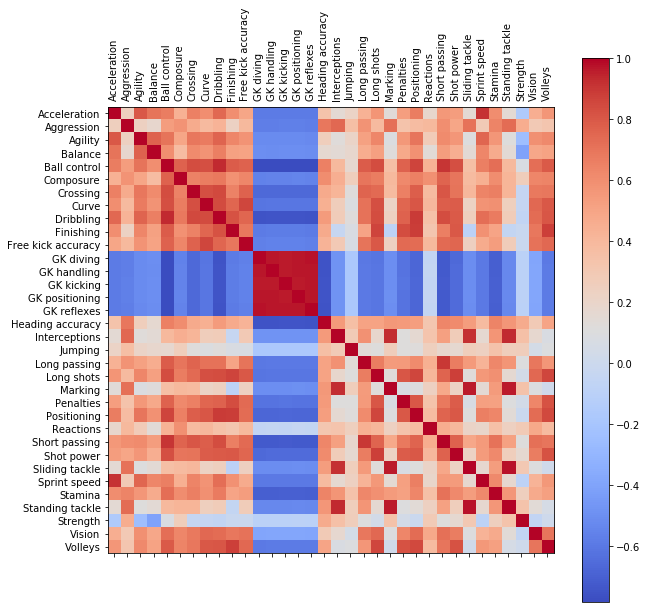

In [10]:
# check corr
correlations = data_scaled.corr()

# print df with color:
#correlations.style.background_gradient(cmap = 'coolwarm')

# print smaller as heatmap
feature_names = list(correlations)

plt.figure(figsize=(10, 10)) 
plt.imshow(correlations, cmap = 'coolwarm') # interpolation = 'nearest'
plt.tick_params(labeltop = 1, labelbottom = 0)
plt.xticks(range(len(feature_names)), feature_names, rotation = 90)
plt.yticks(range(len(feature_names)), feature_names)
plt.colorbar()
None

In [11]:
# loops over features and compares 1 by all other, every relation only ONCE

corr_threshold = [0.8]

correlated_features = []
for i in range(len(correlations.columns)):
    for j in range(i):
        if abs(correlations.iloc[i, j]) > corr_threshold:
           correlated_features.append(correlations.columns[i])
            
cols_to_remove = list(set(correlated_features))
cols_to_remove

['GK positioning',
 'Short passing',
 'Shot power',
 'Sliding tackle',
 'Dribbling',
 'Crossing',
 'Positioning',
 'Volleys',
 'Free kick accuracy',
 'Curve',
 'Sprint speed',
 'GK handling',
 'Finishing',
 'GK kicking',
 'Standing tackle',
 'Long shots',
 'Marking',
 'GK reflexes',
 'Penalties']

In [12]:
data_scaled_clean = data_scaled.drop(columns = cols_to_remove)
data_scaled_clean.head(5)

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,GK diving,Heading accuracy,Interceptions,Jumping,Long passing,Reactions,Stamina,Strength,Vision
0,1.636816,0.410909,1.734681,-0.057864,2.076961,2.870360,-0.547365,2.048101,-0.849040,2.532658,1.580033,3.717432,1.804927,1.165776,2.222647
1,1.838069,-0.447806,1.802290,2.212609,2.196018,2.947720,-0.603576,1.071633,-1.187497,0.260771,2.223732,3.608400,0.611645,-0.498640,2.570182
2,1.972237,0.010175,2.207944,1.290229,2.196018,2.638280,-0.434944,0.554680,-0.510583,-0.328237,1.451294,2.845183,0.925666,-0.974188,1.875113
3,1.569732,1.269625,1.531855,-0.270720,1.957904,1.942040,0.576844,1.416269,-0.268828,0.344915,0.743226,3.390338,1.616514,1.165776,2.153140
4,-0.442795,-1.535512,-0.766848,-2.044527,-0.601824,0.936361,4.174314,-1.570574,-0.800689,1.102211,0.421377,2.518090,-1.209681,1.403550,1.180044


In [15]:
data_scaled_clean.head(5)

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,GK diving,Heading accuracy,Interceptions,Jumping,Long passing,Reactions,Stamina,Strength,Vision
0,1.636816,0.410909,1.734681,-0.057864,2.076961,2.870360,-0.547365,2.048101,-0.849040,2.532658,1.580033,3.717432,1.804927,1.165776,2.222647
1,1.838069,-0.447806,1.802290,2.212609,2.196018,2.947720,-0.603576,1.071633,-1.187497,0.260771,2.223732,3.608400,0.611645,-0.498640,2.570182
2,1.972237,0.010175,2.207944,1.290229,2.196018,2.638280,-0.434944,0.554680,-0.510583,-0.328237,1.451294,2.845183,0.925666,-0.974188,1.875113
3,1.569732,1.269625,1.531855,-0.270720,1.957904,1.942040,0.576844,1.416269,-0.268828,0.344915,0.743226,3.390338,1.616514,1.165776,2.153140
4,-0.442795,-1.535512,-0.766848,-2.044527,-0.601824,0.936361,4.174314,-1.570574,-0.800689,1.102211,0.421377,2.518090,-1.209681,1.403550,1.180044


In [17]:
# save 
data_scaled_clean.to_csv('/Users/iMotz/Propulsion/Machine_learning/data_sets/Doris_football_clean.csv')



### Try clustermap

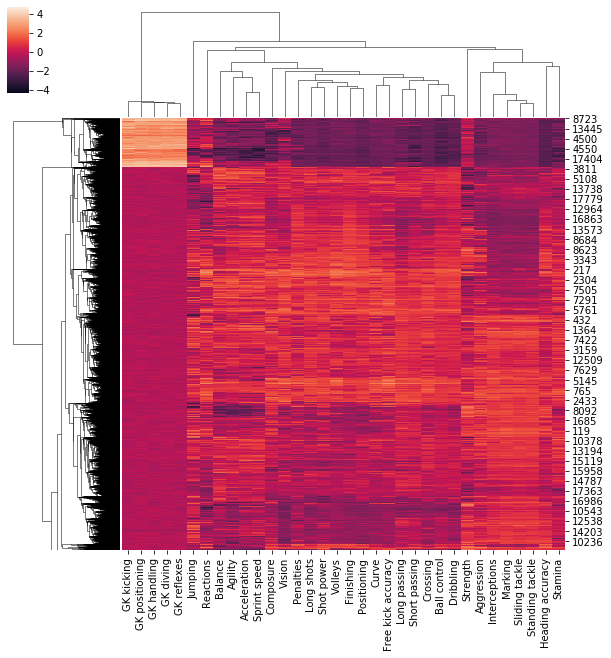

In [18]:
# clustermap(data, pivot_kws=None, method='average', metric='euclidean', 
#            z_score=None, standard_scale=None, 
#            figsize=None, cbar_kws=None, row_cluster=True, col_cluster=True, 
#            row_linkage=None, col_linkage=None, 
#            row_colors=None, col_colors=None, mask=None, **kwargs)

sns.clustermap(data_scaled, metric = 'euclidean')
None

### K means cluster

#### Elbow plot

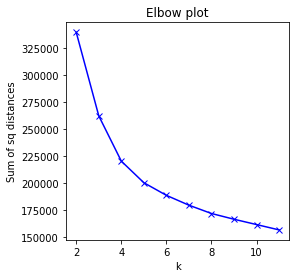

In [19]:
# Elbow plot

# loop over diff cluster numbers to find optimal k
Sum_of_squared_distances = []
for i in range(2,12):
    result_kmeans = KMeans(n_clusters = i).fit(data_scaled)
    Sum_of_squared_distances.append(result_kmeans.inertia_)
        
# Plot the elbow
plt.rcParams['figure.figsize'] = (4, 4)
plt.plot(range(2,12), Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of sq distances')
plt.title('Elbow plot')
None

#### Silhouette plot

Silhouette index (overall average silhouette): a larger Silhouette value indicates a better quality of a clustering result

Silhouette coefficient: from -1 (worst) to 1 (best). 

Values near 0 indicate overlapping clusters. 

Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.


In [ ]:
# loop over diff cluster numbers to find optimal silh score
silh_scores = []
for i in range(2,12):
    cluster_ids = KMeans(n_clusters = i).fit_predict(data_scaled_clean)
    silh_scores.append(silhouette_score(data_scaled_clean, cluster_ids)) 


In [ ]:
plt.rcParams['figure.figsize'] = (4, 4)
plt.plot(range(2,12), silh_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette coefficient')
plt.title('Silhouette plot')
None

#### Cluster

In [ ]:
# KMeans(n_clusters=8, init=’k-means++’, n_init=10, max_iter=300, tol=0.0001, 
#        precompute_distances=’auto’, verbose=0, random_state=None, 
#        copy_x=True, n_jobs=None, algorithm=’auto’)

result_kmeans = KMeans(n_clusters = 4).fit(data_scaled_clean)

cluster_ID = result_kmeans.labels_


In [ ]:
# add cluster ID to df, sort!
data_sorted_ID = data_scaled_clean.copy() # copy of orig

data_sorted_ID['Cluster_ID'] = cluster_ID # add col
data_sorted_ID = data_sorted_ID.sort_values('Cluster_ID', ascending = True).reset_index()

data_sorted = data_sorted_ID.drop(columns = ['Cluster_ID','index'])


In [ ]:
# plot heat map with seaborn, 

# HOW TO ADD bar for cluster ID??

# row_colors = list of IDs

plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(data_sorted, cmap = 'coolwarm')
None

In [ ]:
# get mean/center of clusters
centroids = result_kmeans.cluster_centers_

centroids_df = pd.DataFrame(centroids, columns = list(data_scaled_clean))
centroids_df.style.background_gradient(cmap = 'coolwarm')


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

ax = plt.figure().add_subplot(111, projection='3d')
ax.set_xlim([-2.5, 2.5])
ax.set_ylim([-2.5, 2.5])
ax.set_zlim([-2, 3.5])
ax.set_xlabel('Aggression')
ax.set_ylabel('Strength')
ax.set_zlabel('GK diving')
#ax.scatter(centroids_df['Aggression'],centroids_df['Strength'], centroids_df['GK diving'],c=['red','black','blue','green'], marker='*',s=100)
ax.scatter(data_sorted_ID['Aggression'],data_sorted_ID['Strength'], data_sorted_ID['GK diving'], c = data_sorted_ID['Cluster_ID'], s=1)
None

#### Get most important feature for each cluster IDENTITY 

I) Do 1000 permutations on one feature and get Silhouette Coefficients (SC), compare to original SC

II) Perform Kruskal Wallis test on col1(ID==1) versus col1(ID!=1), loop over all clusters and cols;
if high p-value: significantly different.



In [ ]:
# permutations
col_names = list(data_scaled_clean)

list_rand_SC = []
list_of_list_rand_SC = []

for col in col_names:
    real_SC = silhouette_score(np.array(data_scaled_clean[col]).reshape(-1, 1), cluster_ids)

    permut_data = data_scaled_clean.copy()
    
    for n in range(20):
        permut_data[col] = np.random.permutation(data_sorted_ID[col]) 
        list_rand_SC.append(silhouette_score(np.array(permut_data[col]).reshape(-1, 1), cluster_ids))
    
    list_rand_SC[col] = list_rand_SC

    
    


# def permutation_importances(rf, X_train, y_train, metric):
#     baseline = metric(rf, X_train, y_train)
#     imp = []
#     for col in X_train.columns:
#         save = X_train[col].copy()
#         X_train[col] = np.random.permutation(X_train[col])
#         m = metric(rf, X_train, y_train)
#         X_train[col] = save
#         imp.append(baseline - m)
#     return np.array(imp)

### Hierarchical 

In [ ]:
# shc.dendrogram(Z, p=30, truncate_mode=None, color_threshold=None, get_leaves=True, 
#                orientation='top', labels=None, count_sort=False, distance_sort=False, 
#                show_leaf_counts=True, no_plot=False, no_labels=False, color_list=None, 
#                leaf_font_size=None, leaf_rotation=None, leaf_label_func=None, no_leaves=False, 
#                show_contracted=False, link_color_func=None, ax=None)


# my_linkage = shc.linkage(a, method=method)


# #generate dendrogram
# shc.dendrogram(data_scaled)#, truncate_mode = "lastp", p =12, leaf_rotation=45,leaf_font_size=15, show_contracted=True)
# plt.title("Truncated Hierachial Clustering Dendrogram")
# plt.xlabel("Cluster Size")
# plt.ylabel("Distance")
# #divide the cluster
# plt.axhline(y=15)
# plt.axhline(5)
# plt.axhline(10)
# plt.show()

In [ ]:
# cluster_IDs_agglo = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward').fit_predict(data_scaled)   
# cluster_IDs_agglo

In [ ]:
#dend = shc.dendrogram(shc.linkage(data_scaled, method = 'ward')) 

# plt.figure(figsize=(10, 7))  
# plt.title("Customer Dendograms")  



In [ ]:
# # plot result
# plt.figure(figsize=(10, 7))  
# plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow') 

### DBScan